# Question 2

In [ ]:
library(tidyverse)

The deflection temperature under load for two different formulations of ABS plastic pipe is being studied. Two samples of 12 observations are prepared using each formulation (F1 and F2), and the deflection temperatures (in F) are reported below:

F1,206,188,205,187,193,207,185,189,192,210,194,178
F2,177,197,206,201,176,185,200,197,198,188,189,203


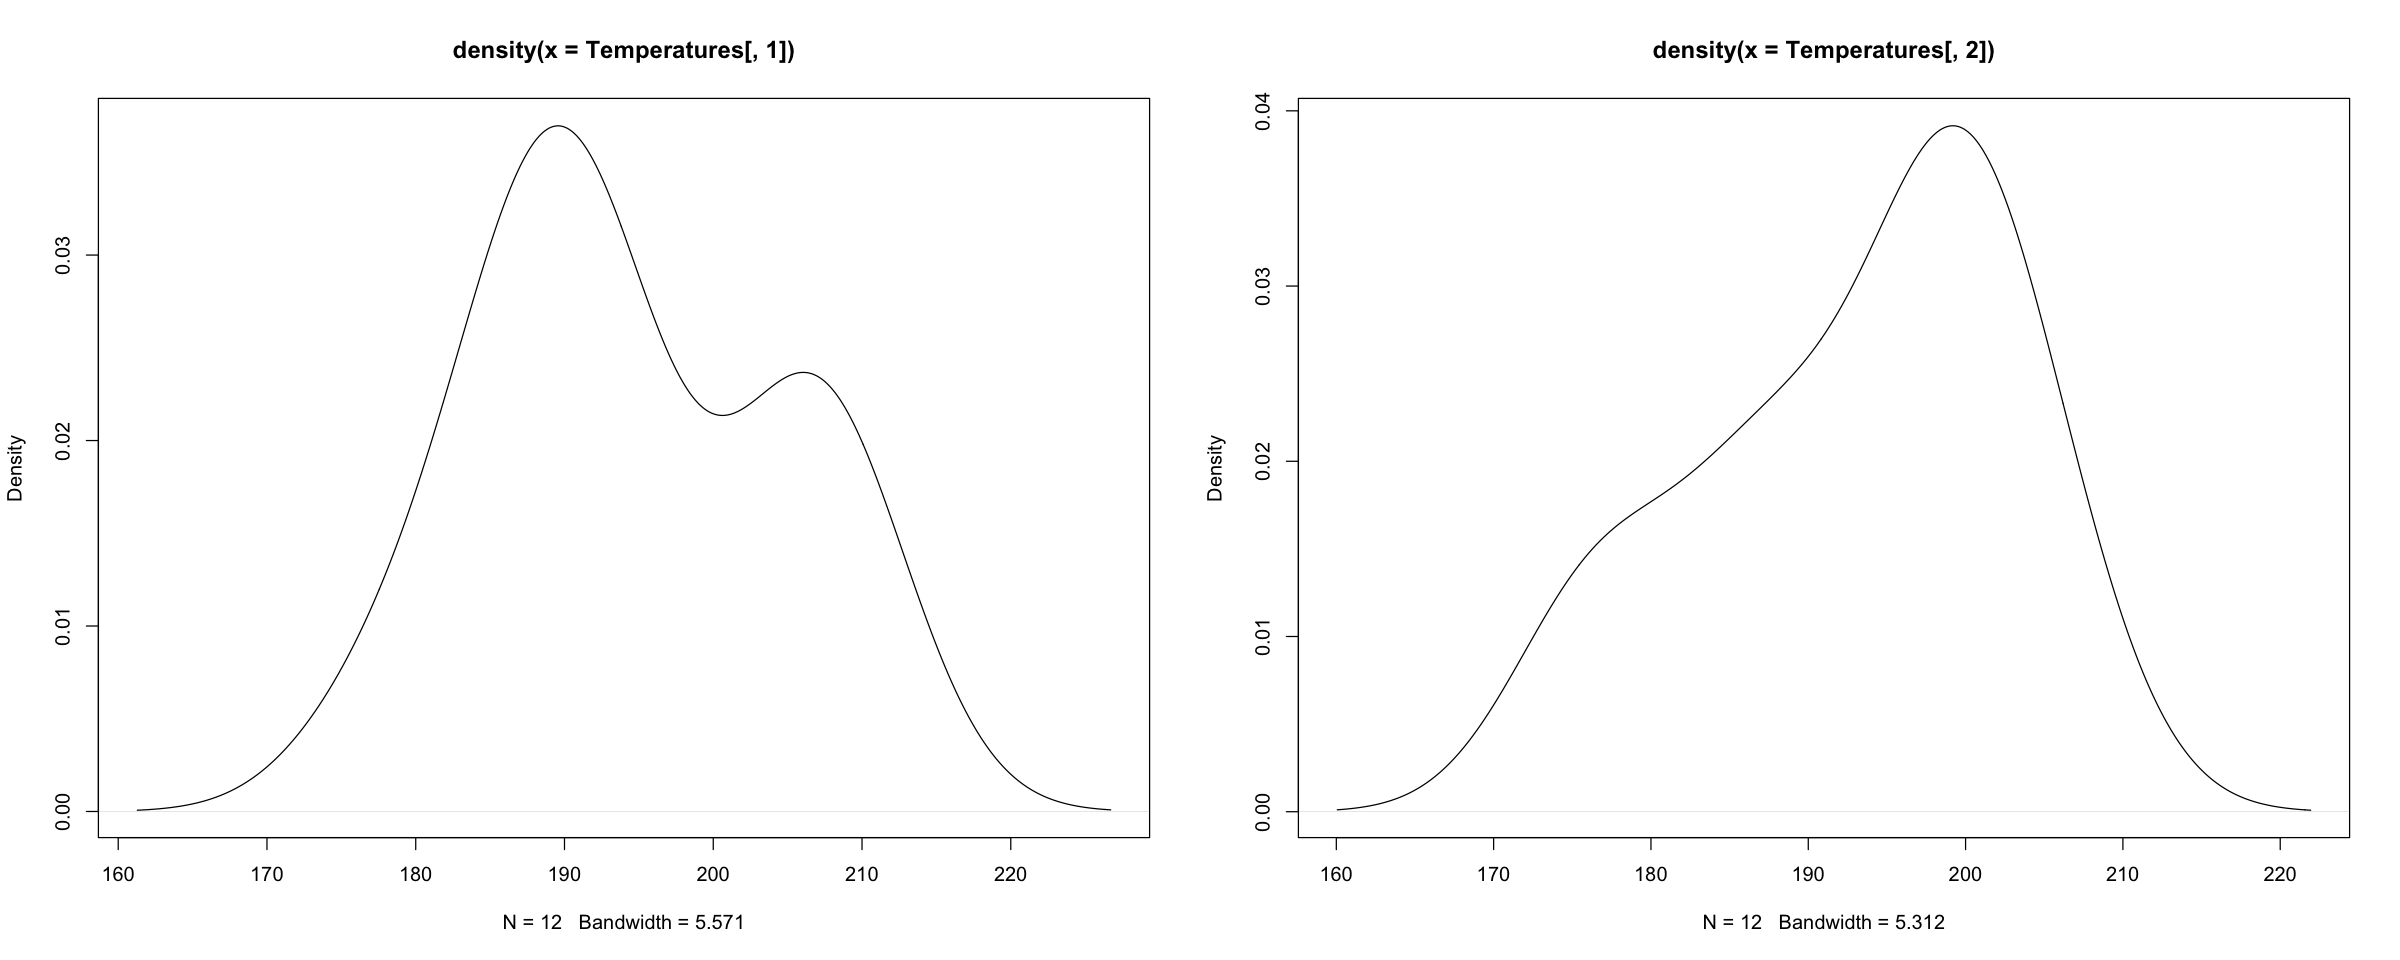

In [11]:
Temperatures <- matrix(
    c(206, 188, 205, 187, 193, 207, 185, 189,
      192, 210, 194, 178, 177, 197, 206, 201,
      176, 185, 200, 197, 198, 188, 189, 203),
      ncol = 2)
colnames(Temperatures) <- c("F1", "F2")
t(Temperatures)
n <- length(Temperatures[,1])
par(mfrow = c(1, 2))
options(repr.plot.width = 20, repr.plot.height = 8)
plot(density(Temperatures[,1]))
plot(density(Temperatures[,2]))

The goal is to investigate whether the data support the claim that the mean deflection temperature under load for formulation 2 exceeds that of formulation 1.

a) Use $\alpha=0.05$ to perform a complete analysis in R, including normality check and the appropriate test. Use the rejection region method to test your hypothesis.

Before conducting our hypothesis test it is necessary to check for normality and to test if the variances are equal. We can get an idea of normality by creating QQ plots and we can compare variances using a box plot.

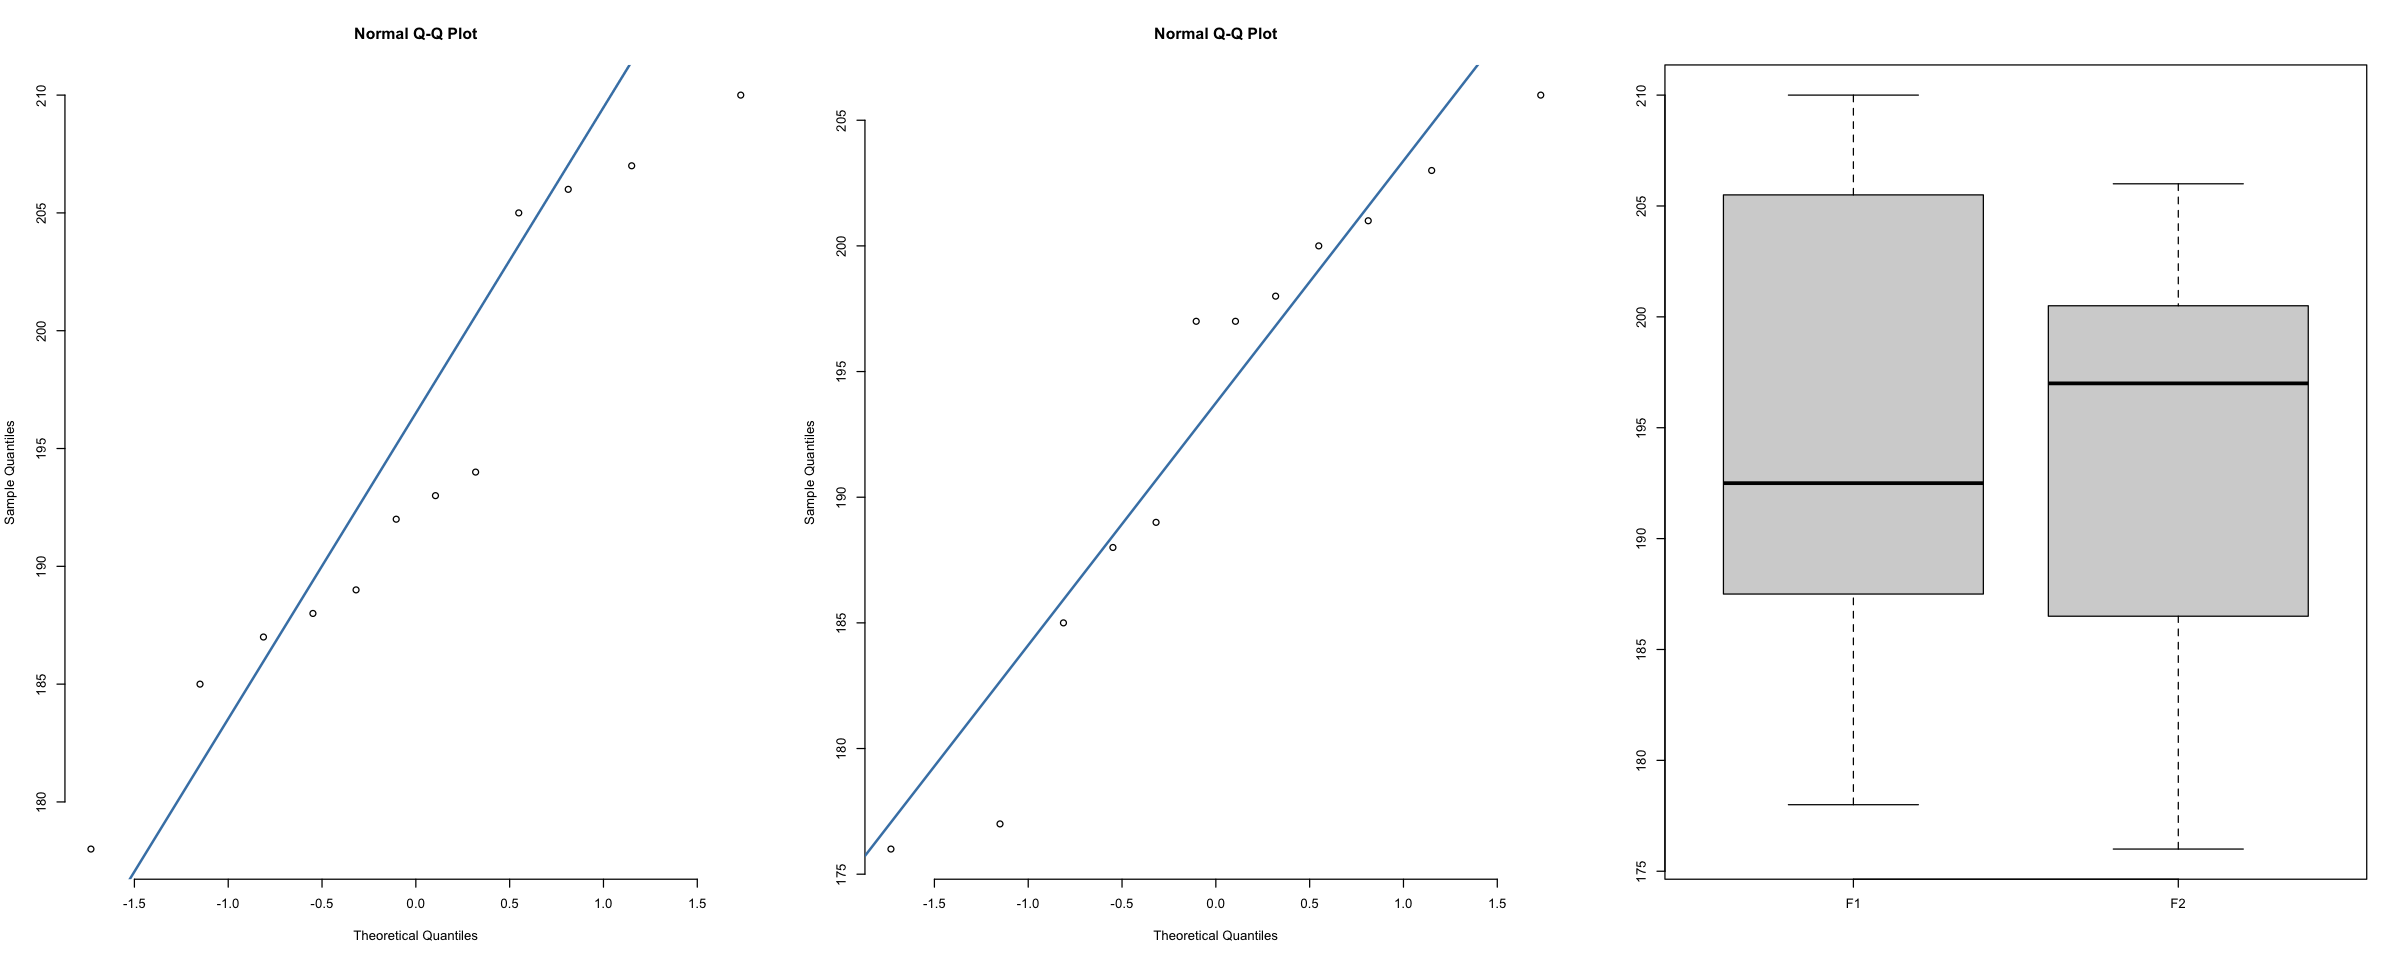

In [44]:
par(mfrow = c(1, 3))
options(repr.plot.width = 20, repr.plot.height = 8)
# QQ plot of first formulation.
qqnorm(Temperatures[,1], pch = 1, frame = FALSE)
qqline(Temperatures[,1], col = "steelblue", lwd = 2)
# QQ plot of second formulation.
qqnorm(Temperatures[,2], pch = 1, frame = FALSE)
qqline(Temperatures[,2], col = "steelblue", lwd = 2)
# Box Plot of formulations.
boxplot(Temperatures)

The QQplots follow the lines fairly closely, it appears that the normality assumptions are justified. The boxplot shows similar variances for the two distributions. We will verify by conducting a test.

In [45]:
var.test(Temperatures[,1], Temperatures[,2])


	F test to compare two variances

data:  Temperatures[, 1] and Temperatures[, 2]
F = 1.046, num df = 11, denom df = 11, p-value = 0.9419
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3011181 3.6334674
sample estimates:
ratio of variances 
          1.045994 


The F-statistic of $1.046$ gives a p-value of $0.9419$, suggesting there is no evidence that the variances are different. We will assume equal variances under our hypothesis test.

**Hypothesis Test Using Rejection Rejoin Method**

We are interested in whether the deflection temperature of formulation 2 exceeds formulation 1, thus we can state the null hypothesis as:  
$$ H_0: \mu_1 = \mu_2 \\ 
H_1: \mu_1 < \mu_2 
$$
where $\mu_1$ and $\mu_2$ are the means of the two formulations respectively. Thus we have a one-sided, two sample t-test, where we assume equal variances because of our work above. We can conduct the test in R as follows:

In [6]:
test <- t.test(Temperatures[,1], Temperatures[,2], alternative = "less", paired = FALSE, var.equal = TRUE, conf.level = 0.95)
test


	Two Sample t-test

data:  Temperatures[, 1] and Temperatures[, 2]
t = 0.34483, df = 22, p-value = 0.6333
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 8.471217
sample estimates:
mean of x mean of y 
 194.5000  193.0833 


The t-statistic of $0.34483$ gives a p-value of $0.6333$. We do not have sufficient evidence to reject the null hypothesis in favour of the null. 

b) Does the confidence interval support your conclusion on part a? Justify.

The output of our test gives a 95 percent confidence interval of $(-\infty , 8.4712)$, which contains the value $0$. This supports our conclusion above, as we would expect a confidence interval that fails to reject a difference in the two samples to contain the value $0$.